This notebook is free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).
____

# Getting Started with Citation-based Social Network Analysis, Part 2

This is lesson 2 of 3 in the educational series on Social Network Analysis. This notebook is intended to teach students how to use Python to prepare a table of citation data in preparation for using Gephi in the third lesson.

**Audience:** Teachers

**Use case:** Tutorial

**Difficulty:** Beginner / Mixed

**Completion time:** 45 minutes

**Knowledge Required:** 
* Python basics, such as:
   * Data types, including strings
   * Functions (built-in and user-created)
   * Importing libraries
* Social network analysis basics, including its application to citation analysis

**Knowledge Recommended:**
* Any experience with the Pandas library in Python
* Any additional social network analysis experience

**Learning Objectives:**
After this lesson, learners will be able to:
* Deploy Pandas Dataframes to manage tabular data
* Select built-in and user-created functions to clean data in preparation for Gephi
* Manage the import and export of files in notebook environments
___

# Required Python Libraries
* [Constellate Client](https://pypi.org/project/constellate-client/) for accessing data collected with Constellate.
* [Pandas](https://pandas.pydata.org/) for manipulating and cleaning data.

## Install Required Libraries

In [ ]:
### Install Libraries ###

# Using !pip installs
!pip install constellate-client

In [ ]:
### Import Libraries ###
import pandas as pd
import constellate

# Required Data

**Data Format:** 
* tables (.csv)

**Data Source:**
* [Constellate](https://constellate.org/)

**Data Quality/Bias:**
The data are limited to academic journals that have been indexed by JSTOR or Portico.

**Data Description:**
Our dataset consists of journal article metadata, including author(s) (i.e. "creator") and journal titles (i.e. "isPartOf") from a collection of articles available through [JSTOR](https://about.jstor.org/) and [Portico](https://www.portico.org/) that mention "Lake Champlain" published between 1930 and 1940.

## Download Required Data

In [ ]:
### Constellate Example ###

# Importing your dataset with a dataset ID
# Pull in metadata about the dataset that matches `dataset_id`
# in the form of a comma-separated file of metadata.
# Our dataset has less than 889 documents.
# If you retrieve a dataset of more than 1500 documents, 
# 1500 document sample will be used.
dataset_file = constellate.get_metadata("0357e38d-31ca-952a-cb3e-3f451aad2e07")

# To download a full dataset (up to a limit of 25,000 documents),
# request it first in the builder environment. See the Constellate Client
# documentation at: https://constellate.org/docs/constellate-client
# Then use the `constellate.download` method show below.
#dataset_file = constellate.download(dataset_id, 'jsonl')


# Introduction

This lesson will walk you through strategies in preparing, or cleaning, metadata for social network analysis based on citations. Your analysis is only as accurate as the quality of your data, so taking the time to ensure that it is as accurate as possible and reasonable will pay off at later stages of analysis.
Gephi ultimately needs separate sources of data for nodes (in our case, specific, unique authors) and edges (common media of publication). We are going to be using a tool called [Table 2 Net](http://medialab.github.io/table2net/) to separate all of this out in the 3rd workshop. For this workshop, our focus will be on cleaning data, deploying skills that can be used in managing textual data in a variety of circumstances. Once set up, the steps in this notebook will run quickly and efficiently. 

Ultimately, we will have a social network that looks like this: 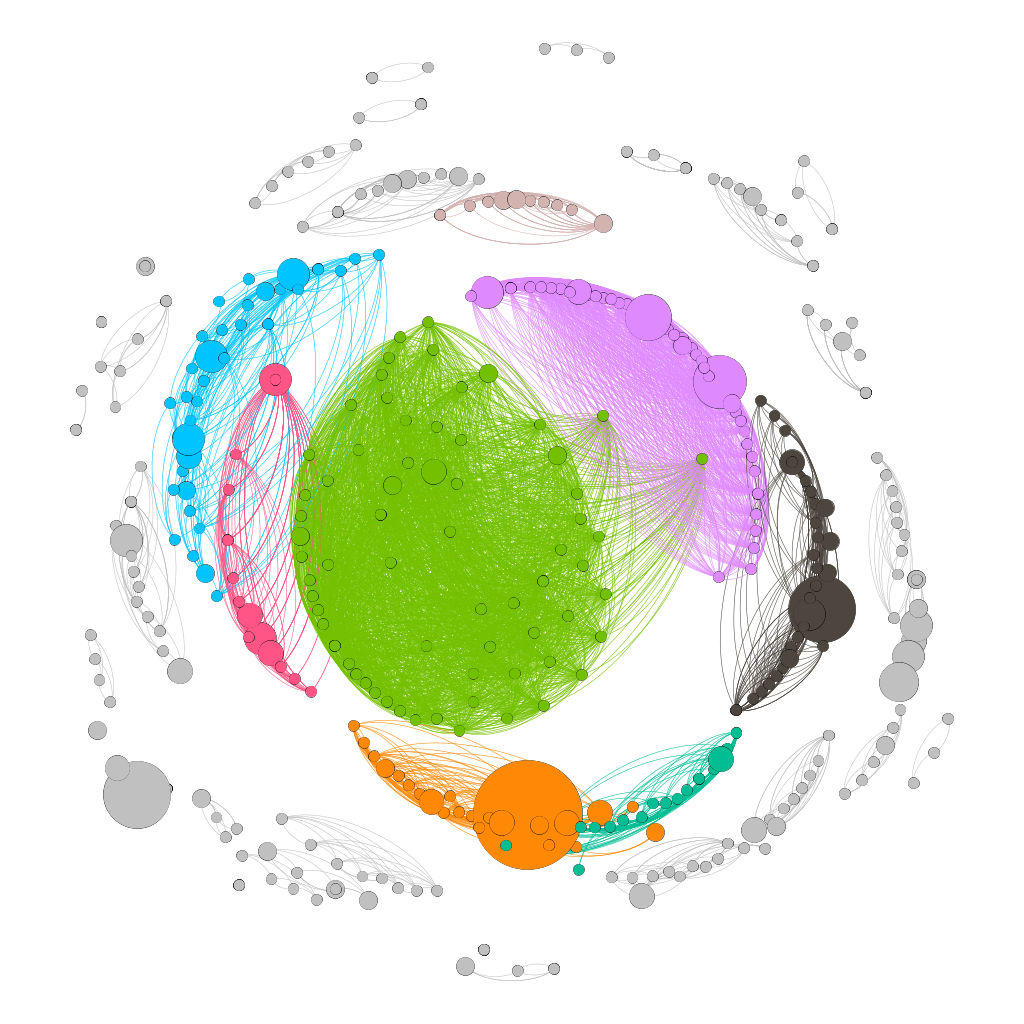

Note that options exist to prepare all of your data for Gephi using Python without using an intermediating tool, notably with the [NetworkX](https://networkx.org/) library. This allows you to be precise with your nodes, edges, and attributes needs, but requires a more advanced understanding of social networks that you have now and has more room for user error.

### Getting Started
Our social network will analyze author publication patterns of articles that refer to Lake Champlain, published between 1930 and 1940, selected from hundreds of journals and magazines. The network we build with Gephi in the next part of the workshop will identity writer communities that publish in the same clusters of journals. We can find the data that we need to create this network in article metadata, and we have some work to do to prepare that metadata for Gephi. For our metadata, we will be importing a curated dataset generated using Constellate. 

If you have already run the Download Required Data cell above, you already have the metadata imported into the notebook environment. To more easily examine this metadata, we will import it into a special data structure known as a DataFrame.

### Putting Our Metadata into a Table

Our metadata imported as a comma-separated values file (.csv), so we can use a built-in Pandas function to put that data into a dataframe.

In [ ]:
metadata_df = pd.read_csv(dataset_file)

We can see our new Dataframe by running a cell that contains its name, metadata_df

In [ ]:
metadata_df

You may encounter other ways of storing tabular data in Python, including a nested dictionary. The DataFrame is easy to set-up, easy for you as an end-user to read, and can be managed and manipulated using a variety of built-in Pandas functions.

Our DataFrame has a large number of columns, most of which happen to be irrelevant to the social network we are building. One of these built-in Pandas functions can help us with that; we can make a copy of our DataFrame that only includes the columns that we need.

In [ ]:
metadata_df = pd.DataFrame(metadata_df, columns= ['isPartOf', 'creator'])

Remember, 'isPartOf' is the name in the original metadata file for the Journals column. 'creator' is the name for authors.

Now let's see how our DataFrame has changed.

In [ ]:
metadata_df

You may notice 'NaN' appearing in the creator column for some entries. This is how the DataFrame presents missing or blank data. Since our DataFrame contains citation data, this means that the articles being referred to here either did not have an attributed author or that the author is missing from the index. 

Either way, since we are using authors as Nodes for our social network, we can ignore these entire rows. We can use another built-in function to delete them automatically.

The dropna() function from Pandas goes through every row in an existing dataframe and outputs a new dataframe that excludes those rows. Note that we cannot just run dropna() on our existing dataframe as it does not edit it. We instead need to save that output to a new dataframe. Remember, though, that we can overwrite.

In [ ]:
metadata_df = metadata_df.dropna()
metadata_df

As you can see, this single operation reduced the size of our DataFrame considerably. We went from 889 rows to 587 rows, losing 302 rows with data that we could not actually use.

### Cleaning tabular data

Nodes will be determined based on unique occurences in the creator column, while the edges that connect out nodes will be established when two nodes share identical content in their isPartOf column. To ensure this matching works properly, you should make all of the text in your cells lower-case.

When we need to perform an action on every cell in a DataFrame, we can use the applymap() built-in function. Applymap(), like other apply functions, takes a function as its argument, and applies that argument to each cell in the DataFrame. 

So, we need to write a loop. If all of our data were in a variable called our_list, we might write the loop like this:

In [ ]:
# Don't run this loop! our_list is not defined.
# for item in our_list:
#    item.lower()

But we can't do that with the entire DataFrame column... and Python will not allow us to set this loop as applymap()'s argument, at least not in its current form. The function we pass to applymap() can be a lambda-style function, a shorthand way of writing the above loop.

In [ ]:
metadata_df = metadata_df.applymap(lambda x: x.lower())
metadata_df

As anticipated, every cell in the DataFrame now contains exclusively lower-case characters.

The choice of lower-case is arbitrary; we could just as easily have chosen upper-case. The function to make all characters upper-case is upper(). Can you complete the cell below so that it makes all characters in our DataFrame upper-case?

In [ ]:
# Complete the function on the line below so that all characters in the DataFrame cells are upper-case. Remove comment hashmarks to run.
# metadata_df = metadata_df. 
# metadata_df

Want to go back to all lower-case? Just run the first applymap cell again.

Next up, we will correct some orthographic inconsistencies in our data. Consider the contents of this particular row from our dataframe. Note that we can pull up specific rows by their index number using the built in function .iloc['index_number'].

In [ ]:
metadata_df.iloc[29]

As you work more with a data source, you will learn some trends. For example, in metadata pulled from Constellate, sometimes an author's suffix, such as "jr." or "iii", is not properly or consistently separated from an author's last name. So, you may have one cell that includes this name:
 * j. stewart rankin jr.

And another with this name:
 * j. stewart rankinjr.

Table 2 Net and Gephi will not know that these are the same person, even though it is obvious to the human reader.

We can apply a fix to a cells in the creator column, and could do so with the help of a user-defined function like this.

In [ ]:
def add_space (input_cell, term):
    if " " + term not in input_cell:
        return input_cell.replace(term, " " + term)
    else:
        return input_cell

Let's break this down line-by-line.

<strong>def add_space (input_cell, term):</strong>
* a user defined function needs a name, add_space, and set arguments that it takes. It does not matter what input_cell and term are known as when this function is called in your program; those names are just for use internally by the function. For the purposes of this explanation, let's say that the term we are using is "jr" We will go over how the function obtains input_cell later.

<strong>if " " + term nor in input_cell:</strong>
* this checks if the cell the function is acting already has the string " jr" (i.e. a blank space before the defined term) somewhere in its text. If it does NOT already include " jr" the function will proceed to the next line. If it does, the function will move on to the else below.

<strong>return input_cell.replace(term, " " + term)</strong>
* This takes the data in the cell the function is running on and replaces any mentions of the term "jr" with " jr". Remember, the mentions of the term that already have a space in front of them do not make it to this action, so you will not accidentally create cells with a double-space.

<strong>else:</strong>
* this catches every cell run through this function that did not meet the criteria of the previous if statement. For our purposes, this would be any cell that contains the string " jr"

<strong>return input_cell:</strong>
* The cells that made it to the else option do not need anything done to them, so we can just send the cell back as is.

Now, we need to run the contents of all cells in the creator column. We can use an apply() function from Pandas, which runs only on specified cells instead of the entire DataFrame, and we can once again use a lambda function.

In [ ]:
metadata_df["creator"] = metadata_df["creator"].apply(lambda x: add_space(x, 'jr'))

Now, let's see how the row we were looking at earlier has changed.

How could you edit the function below to fix any "iii" suffixes that are not preceded by a space?

In [ ]:
metadata_df.iloc[29]

In [ ]:
# Add the proper arguments to the add_space() function to fix any 'iii' suffix spacing issues. Remove comment hashmarks to run.
# metadata_df["creator"] = metadata_df["creator"].apply(lambda x: add_space())

### Exporting your dataset

After you have cleaned up the data in your DataFrame, you are ready to export it to a .csv file for future steps. Pandas has an easy, built-in function for exporting DataFrames.

In [ ]:
metadata_df.to_csv('output.csv')

Once you run that cell, you will find this new file in the same folder as this notebook. You can then open up that file in a spreadsheet application or run it through Table 2 Net.

Now you have a clean and usable dataset that we will use in our next lesson to develop a citation-based social network with Gephi.

### A few more tips for navigating DataFrames

Do you want to take a look at your DataFrame in Python before exporting it? You may find the preview of it insufficient. Maybe you want to view the first 50 rows in your DataFrame instead. You can do so like this:

In [ ]:
metadata_df.head(50)

This will not change your original preview settings.

In [ ]:
metadata_df

To change those settings, we need to change the maximum number of rows that a DataFrame will display

In [ ]:
pd.set_option('display.max_rows', 600)
metadata_df

And if we want our display settings to go back to normal:

In [ ]:
pd.reset_option('display.max_rows')
metadata_df